In [1]:
import lucem_illud
import networkx as nx

import sklearn 
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn
import scipy 
import nltk
from IPython.display import Image

import pickle
import os

In [2]:
tweets = pd.read_csv('cleaned_tweets.csv', index_col=0)

In [3]:
tw_small = tweets[tweets.foreign_frac < 0.4]

Intovert vs. Extravert

In [4]:
introvert = tw_small[tw_small.extravert == 0]

In [5]:
extravert = tw_small[tw_small.extravert == 1]

Prospecting vs. Judging

In [6]:
prospecting = tw_small[tw_small.judging == 0]

In [7]:
judging = tw_small[tw_small.judging == 1]

Intuiitive vs. Observant

In [8]:
intuitive = tw_small[tw_small.intuitive == 1]

In [9]:
observant = tw_small[tw_small.intuitive == 0]

Analyst vs. Diplomat vs. Sentinel vs. Explorer

In [10]:
analyst = tw_small[(tw_small.type == 'INTJ') | (tw_small.type == 'INTP') | (tw_small.type == 'ENTJ') | (tw_small.type == 'ENTP')]

In [11]:
diplomat = tw_small[(tw_small.type == 'INFJ') | (tw_small.type == 'INFP') | (tw_small.type == 'ENFJ') | (tw_small.type == 'ENFP')]

In [12]:
sentinel = tw_small[(tw_small.type == 'ISTJ') | (tw_small.type == 'ISFJ') | (tw_small.type == 'ESTJ') | (tw_small.type == 'ESFJ')]

In [13]:
explorer = tw_small[(tw_small.type == 'ISTP') | (tw_small.type == 'ISFP') | (tw_small.type == 'ESTP') | (tw_small.type == 'ESFP')]

# Characterizing the Structure of Words and Documents

In [14]:
dfs = [introvert, extravert, prospecting, judging, intuitive, observant, analyst, diplomat, sentinel, explorer]

In [15]:
df_labels = ['introvert', 'extravert', 'prospecting', 'judging', 'intuitive', 'observant', 'analyst', 'diplomat', 'sentinel', 'explorer']

In [16]:
#remove this chunk when working with full data
for i, df in enumerate(dfs):
    dfs[i] = df.sample(n=100)

In [ ]:
analyst = pd.read_json('/Users/egemenpamukcu/Downloads/Homework-Notebooks-master/week-5/data/analyst.json')
diplomat = pd.read_json('/Users/egemenpamukcu/Downloads/Homework-Notebooks-master/week-5/data/diplomat.json')
explorer = pd.read_json('/Users/egemenpamukcu/Downloads/Homework-Notebooks-master/week-5/data/explorer.json')
extravert = pd.read_json('/Users/egemenpamukcu/Downloads/Homework-Notebooks-master/week-5/data/extravert.json')
introvert = pd.read_json('/Users/egemenpamukcu/Downloads/Homework-Notebooks-master/week-5/data/introvert.json')
intuitive = pd.read_json('/Users/egemenpamukcu/Downloads/Homework-Notebooks-master/week-5/data/intuitive.json')
judging = pd.read_json('/Users/egemenpamukcu/Downloads/Homework-Notebooks-master/week-5/data/judging.json')
observant = pd.read_json('/Users/egemenpamukcu/Downloads/Homework-Notebooks-master/week-5/data/observant.json')
prospecting = pd.read_json('/Users/egemenpamukcu/Downloads/Homework-Notebooks-master/week-5/data/prospecting.json')
sentinel = pd.read_json('/Users/egemenpamukcu/Downloads/Homework-Notebooks-master/week-5/data/sentinel.json')

In [19]:
for df in dfs:
    df['tokenized_sents'] = df['clean_text'].apply(lambda x: [lucem_illud.word_tokenize(s) for s in lucem_illud.sent_tokenize(x)])
    df['normalized_sents'] = df['tokenized_sents'].apply(lambda x: [lucem_illud.normalizeTokens(s) for s in x])

In [27]:
df_dict = {df_labels[i]: dfs[i] for i in range(len(dfs))}

In [20]:
def wordCooccurrence(sentences, makeMatrix = False):
    words = set()
    for sent in sentences:
        words |= set(sent)
    wordLst = list(words)
    wordIndices = {w: i for i, w in enumerate(wordLst)}
    wordCoCounts = {}
    #consider a sparse matrix if memory becomes an issue
    coOcMat = np.zeros((len(wordIndices), len(wordIndices)))
    for sent in sentences:
        for i, word1 in enumerate(sent):
            word1Index = wordIndices[word1]
            for word2 in sent[i + 1:]:
                coOcMat[word1Index][wordIndices[word2]] += 1
    if makeMatrix:
        return coOcMat, wordLst
    else:
        coOcMat = coOcMat.T + coOcMat
        g = nx.convert_matrix.from_numpy_matrix(coOcMat)
        g = nx.relabel_nodes(g, {i : w for i, w in enumerate(wordLst)})
        return g

In [21]:
def contractNetwork(g, targetType):
    g_mono = nx.Graph()
    g_mono.add_nodes_from(((n, d) for n, d in g_2mode.nodes(data = True) if d['bipartite'] == targetType))
    
    for n_outside in (n for n, d in g_2mode.nodes(data = True) if d['bipartite'] != targetType):
        neighbors = list((n for n in g.neighbors(n_outside) if g.nodes[n]['bipartite'] == targetType))
        for i, n1 in enumerate(neighbors):
            for n2 in neighbors[i+1:]:
                try:
                    g_mono.edges[n1, n2]['weight'] += 1
                except KeyError:
                    g_mono.add_edge(n1, n2, weight = 1)
    return g_mono

In [22]:
def tokenize(text):
    tokenlist = lucem_illud.word_tokenize(text)
    normalized = lucem_illud.normalizeTokens(tokenlist)
    return normalized

In [73]:
word_cooccurrences = []
for df in dfs:
    word_cooccurrences.append(wordCooccurrence(df['normalized_sents'].sum()))

In [74]:
categories = {df_labels[i]: [dfs[i], word_cooccurrences[i]] for i in range(len(dfs))}

In [75]:
pd.DataFrame({df_labels[i]: [len(word_cooccurrences[i].nodes), 
                            len(word_cooccurrences[i].edges)] for i in range(len(dfs))},
            index=['nodes', 'edges'])

introvert  extravert  prospecting  judging  intuitive  observant  \
nodes      35656      36725        36546    37286      38886      35419   
edges     822335     855803       785183   851501     871455     782132   

       analyst  diplomat  sentinel  explorer  
nodes    36375     37142     35941     35287  
edges   885112    843051    776477    747141

# Introverts (red) vs. Extraverts (blue)

In [20]:
twVectorizer = sklearn.feature_extraction.text.CountVectorizer(tokenizer = tokenize)
twVects_incidence = twVectorizer.fit_transform(pd.concat([extravert, introvert])['clean_text'])

In [21]:
g_2mode = nx.Graph()

#define all the nodes
g_2mode.add_nodes_from((twVectorizer.get_feature_names()[i] for i in range(twVects_incidence.shape[1])), bipartite = 'word')
g_2mode.add_nodes_from(range(twVects_incidence.shape[0]), bipartite = 'doc')

#add all the edges
g_2mode.add_edges_from(((d, twVectorizer.get_feature_names()[w], {'weight' : twVects_incidence[d, w]}) for d, w in zip(*twVects_incidence.nonzero())))

In [22]:
gDoc = contractNetwork(g_2mode, 'doc')

In [23]:
layout = nx.spring_layout(gDoc, k = 1/3, weight='weight', iterations= 50)

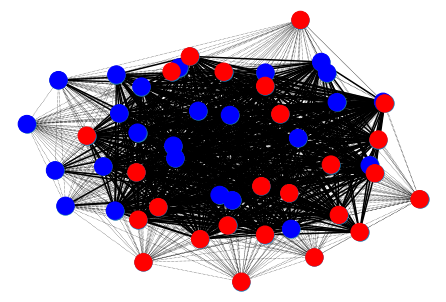

In [24]:
wMedian = np.median([d['weight'] for n1, n2, d in gDoc.edges(data = True)])
edgesHigh = [(n1, n2) for n1, n2, d in gDoc.edges(data = True) if d['weight'] > wMedian]
edgesLow = [(n1, n2) for n1, n2, d in gDoc.edges(data = True) if d['weight'] <= wMedian]
nx.draw(gDoc, pos = layout, edgelist = edgesLow, style='dotted', width=.5)
nx.draw(gDoc, pos = layout, nodelist=None, edgelist = edgesHigh, width=1.5, node_color = ['blue']*extravert.shape[0] + ['red']*introvert.shape[0])

# Prospecting (blue) vs. Judging (red)

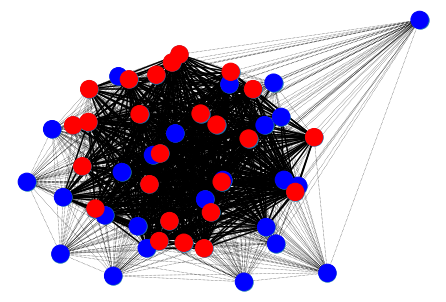

In [25]:
twVectorizer = sklearn.feature_extraction.text.CountVectorizer(tokenizer = tokenize)
twVects_incidence = twVectorizer.fit_transform(pd.concat([prospecting, judging])['clean_text'])

g_2mode = nx.Graph()

#define all the nodes
g_2mode.add_nodes_from((twVectorizer.get_feature_names()[i] for i in range(twVects_incidence.shape[1])), bipartite = 'word')
g_2mode.add_nodes_from(range(twVects_incidence.shape[0]), bipartite = 'doc')

#add all the edges
g_2mode.add_edges_from(((d, twVectorizer.get_feature_names()[w], {'weight' : twVects_incidence[d, w]}) for d, w in zip(*twVects_incidence.nonzero())))

gDoc = contractNetwork(g_2mode, 'doc')
layout = nx.spring_layout(gDoc, k = 1/3, weight='weight', iterations= 50)

wMedian = np.median([d['weight'] for n1, n2, d in gDoc.edges(data = True)])
edgesHigh = [(n1, n2) for n1, n2, d in gDoc.edges(data = True) if d['weight'] > wMedian]
edgesLow = [(n1, n2) for n1, n2, d in gDoc.edges(data = True) if d['weight'] <= wMedian]
nx.draw(gDoc, pos = layout, edgelist = edgesLow, style='dotted', width=.5)
nx.draw(gDoc, pos = layout, nodelist=None, edgelist = edgesHigh, width=1.5, node_color = ['blue']*prospecting.shape[0] + ['red']*judging.shape[0])

# Intuitive (blue) vs. Obersvant (red)

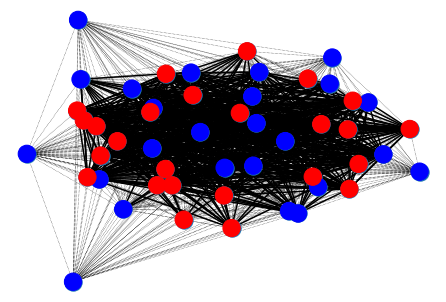

In [26]:
twVectorizer = sklearn.feature_extraction.text.CountVectorizer(tokenizer = tokenize)
twVects_incidence = twVectorizer.fit_transform(pd.concat([intuitive, judging])['clean_text'])

g_2mode = nx.Graph()

#define all the nodes
g_2mode.add_nodes_from((twVectorizer.get_feature_names()[i] for i in range(twVects_incidence.shape[1])), bipartite = 'word')
g_2mode.add_nodes_from(range(twVects_incidence.shape[0]), bipartite = 'doc')

#add all the edges
g_2mode.add_edges_from(((d, twVectorizer.get_feature_names()[w], {'weight' : twVects_incidence[d, w]}) for d, w in zip(*twVects_incidence.nonzero())))

gDoc = contractNetwork(g_2mode, 'doc')
layout = nx.spring_layout(gDoc, k = 1/3, weight='weight', iterations= 50)

wMedian = np.median([d['weight'] for n1, n2, d in gDoc.edges(data = True)])
edgesHigh = [(n1, n2) for n1, n2, d in gDoc.edges(data = True) if d['weight'] > wMedian]
edgesLow = [(n1, n2) for n1, n2, d in gDoc.edges(data = True) if d['weight'] <= wMedian]
nx.draw(gDoc, pos = layout, edgelist = edgesLow, style='dotted', width=.5)
nx.draw(gDoc, pos = layout, nodelist=None, edgelist = edgesHigh, width=1.5, node_color = ['blue']*intuitive.shape[0] + ['red']*observant.shape[0])

# Analyst (blue), Diplomat (red), Sentinel (green), Explorer (grey)

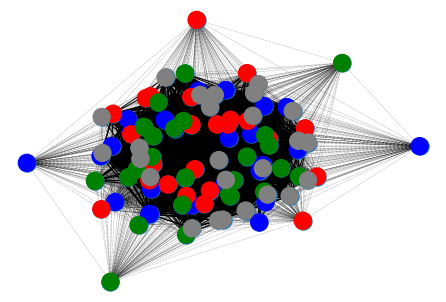

In [27]:
twVectorizer = sklearn.feature_extraction.text.CountVectorizer(tokenizer = tokenize)
twVects_incidence = twVectorizer.fit_transform(pd.concat([analyst, diplomat, sentinel, explorer])['clean_text'])

g_2mode = nx.Graph()

#define all the nodes
g_2mode.add_nodes_from((twVectorizer.get_feature_names()[i] for i in range(twVects_incidence.shape[1])), bipartite = 'word')
g_2mode.add_nodes_from(range(twVects_incidence.shape[0]), bipartite = 'doc')

#add all the edges
g_2mode.add_edges_from(((d, twVectorizer.get_feature_names()[w], {'weight' : twVects_incidence[d, w]}) for d, w in zip(*twVects_incidence.nonzero())))

gDoc = contractNetwork(g_2mode, 'doc')
layout = nx.spring_layout(gDoc, k = 1/3, weight='weight', iterations= 50)

wMedian = np.median([d['weight'] for n1, n2, d in gDoc.edges(data = True)])
edgesHigh = [(n1, n2) for n1, n2, d in gDoc.edges(data = True) if d['weight'] > wMedian]
edgesLow = [(n1, n2) for n1, n2, d in gDoc.edges(data = True) if d['weight'] <= wMedian]
nx.draw(gDoc, pos = layout,edgelist = edgesLow, style='dotted', width=.3,
       alpha=1)
nx.draw(gDoc, pos = layout, nodelist=None, edgelist = edgesHigh, width=1, 
        node_color = ['blue']*analyst.shape[0] + ['red']*diplomat.shape[0] + ['green']*sentinel.shape[0] + ['grey']*explorer.shape[0],
       alpha=1)

# Sentence Cooccurrences, Roles

In [23]:
def connected_component_subgraphs(G):
    for c in nx.connected_components(G):
        yield G.subgraph(c)

## Analyst

In [28]:
g = wordCooccurrence(df_dict['analyst']['normalized_sents'].sum())

In [40]:
g.remove_edges_from([(n1, n2) for n1, n2, d in g.edges(data = True) if d['weight'] <= 50])
g.remove_nodes_from(list(nx.isolates(g))) #since we are changing the graph list() evaluates the isolates first

In [41]:
giant = max(connected_component_subgraphs(g), key=len) # keep just the giant connected component
print(nx.info(giant))

Name: 
Type: Graph
Number of nodes: 62
Number of edges: 172
Average degree:   5.5484


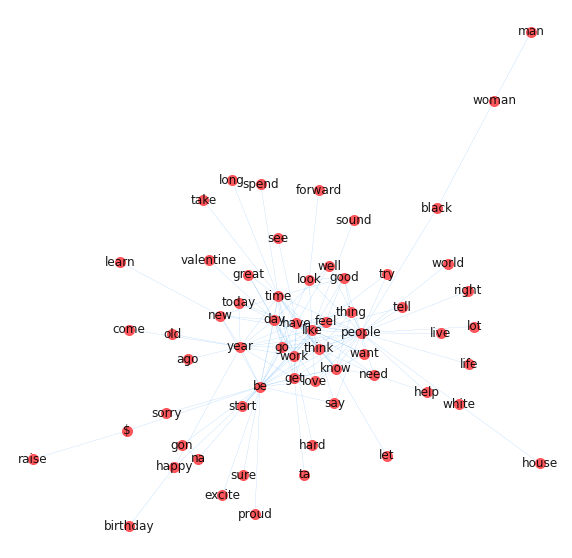

In [42]:
layout = nx.spring_layout(giant, weight='weight', iterations= 100)
fig, ax = plt.subplots(figsize = (10,10))
nx.draw(giant, ax = ax, pos = layout, labels = {n:n for n in giant.nodes()},
        width=.2, 
        alpha = .9, 
        node_size = 100,
        node_color = "xkcd:light red",
        edge_color='xkcd:sky blue') #Getting labels is a bit annoying

## Diplomat

Name: 
Type: Graph
Number of nodes: 53
Number of edges: 153
Average degree:   5.7736


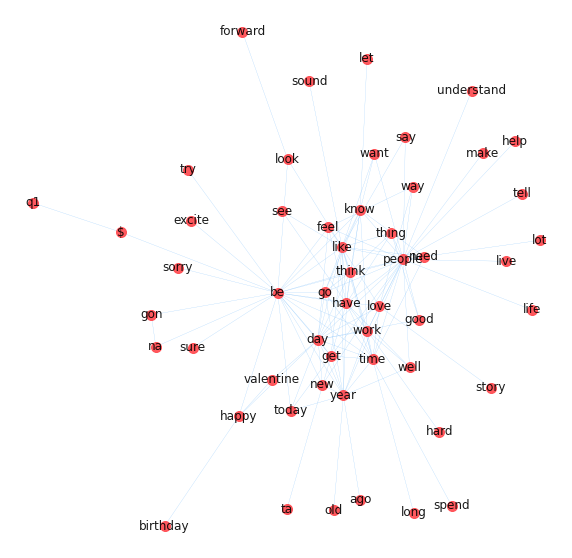

In [44]:
g = wordCooccurrence(df_dict['diplomat']['normalized_sents'].sum())
g.remove_edges_from([(n1, n2) for n1, n2, d in g.edges(data = True) if d['weight'] <= 50])
g.remove_nodes_from(list(nx.isolates(g))) #since we are changing the graph list() evaluates the isolates first
giant = max(connected_component_subgraphs(g), key=len) # keep just the giant connected component
print(nx.info(giant))

layout = nx.spring_layout(giant, weight='weight', iterations= 100)
fig, ax = plt.subplots(figsize = (10,10))
nx.draw(giant, ax = ax, pos = layout, labels = {n:n for n in giant.nodes()},
        width=.2, 
        alpha = .9, 
        node_size = 100,
        node_color = "xkcd:light red",
        edge_color='xkcd:sky blue') #Getting labels is a bit annoying

## Sentinel

Name: 
Type: Graph
Number of nodes: 57
Number of edges: 150
Average degree:   5.2632


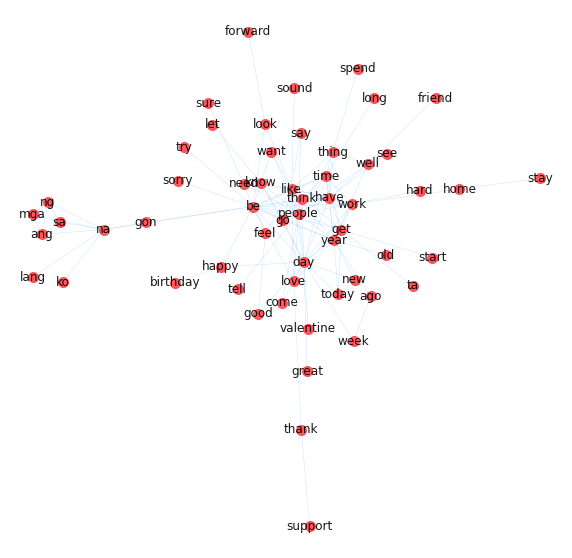

In [45]:
g = wordCooccurrence(df_dict['sentinel']['normalized_sents'].sum())
g.remove_edges_from([(n1, n2) for n1, n2, d in g.edges(data = True) if d['weight'] <= 50])
g.remove_nodes_from(list(nx.isolates(g))) #since we are changing the graph list() evaluates the isolates first
giant = max(connected_component_subgraphs(g), key=len) # keep just the giant connected component
print(nx.info(giant))

layout = nx.spring_layout(giant, weight='weight', iterations= 100)
fig, ax = plt.subplots(figsize = (10,10))
nx.draw(giant, ax = ax, pos = layout, labels = {n:n for n in giant.nodes()},
        width=.2, 
        alpha = .9, 
        node_size = 100,
        node_color = "xkcd:light red",
        edge_color='xkcd:sky blue') #Getting labels is a bit annoying

## Explorer

Name: 
Type: Graph
Number of nodes: 57
Number of edges: 155
Average degree:   5.4386


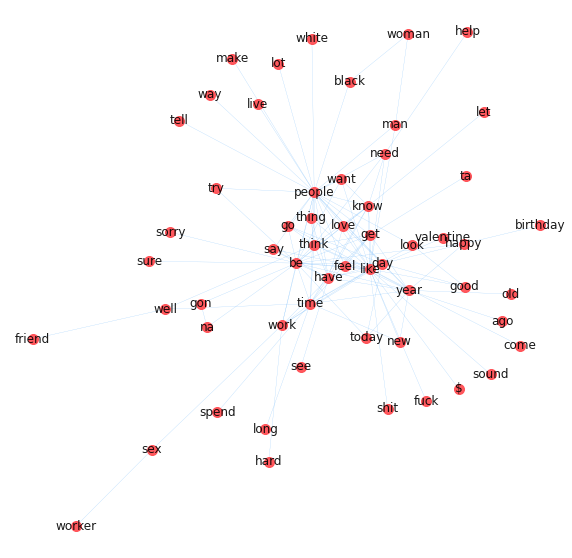

In [59]:
g = wordCooccurrence(df_dict['explorer']['normalized_sents'].sum())
g.remove_edges_from([(n1, n2) for n1, n2, d in g.edges(data = True) if d['weight'] <= 50])
g.remove_nodes_from(list(nx.isolates(g))) #since we are changing the graph list() evaluates the isolates first
giant = max(connected_component_subgraphs(g), key=len) # keep just the giant connected component
print(nx.info(giant))

layout = nx.spring_layout(giant, weight='weight', iterations= 100)
fig, ax = plt.subplots(figsize = (10,10))
nx.draw(giant, ax = ax, pos = layout, labels = {n:n for n in giant.nodes()},
        width=.2, 
        alpha = .9, 
        node_size = 100,
        node_color = "xkcd:light red",
        edge_color='xkcd:sky blue') #Getting labels is a bit annoying

# Sentence Cooccurrences, Introvert vs. Extravert

## Introvert

Name: 
Type: Graph
Number of nodes: 57
Number of edges: 179
Average degree:   6.2807


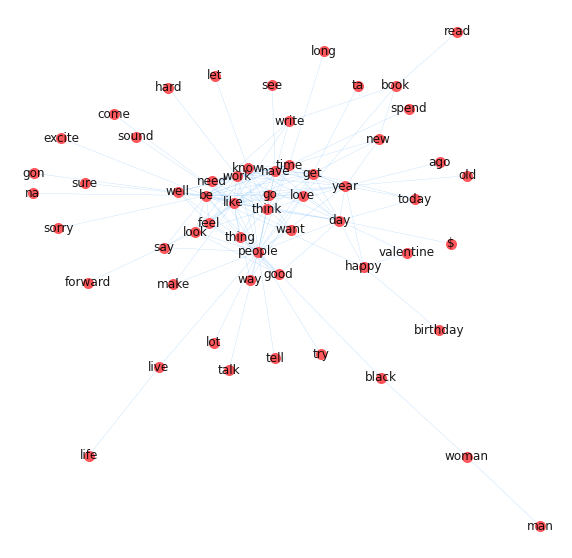

In [60]:
g = wordCooccurrence(df_dict['introvert']['normalized_sents'].sum())
g.remove_edges_from([(n1, n2) for n1, n2, d in g.edges(data = True) if d['weight'] <= 50])
g.remove_nodes_from(list(nx.isolates(g))) #since we are changing the graph list() evaluates the isolates first
giant = max(connected_component_subgraphs(g), key=len) # keep just the giant connected component
print(nx.info(giant))

layout = nx.spring_layout(giant, weight='weight', iterations= 100)
fig, ax = plt.subplots(figsize = (10,10))
nx.draw(giant, ax = ax, pos = layout, labels = {n:n for n in giant.nodes()},
        width=.2, 
        alpha = .9, 
        node_size = 100,
        node_color = "xkcd:light red",
        edge_color='xkcd:sky blue') #Getting labels is a bit annoying

In [61]:
print(', '.join(max(nx.clique.find_cliques(giant), key = lambda x: len(x))))

people, like, be, think, time, get, have, year, day, work


## Extravert

Name: 
Type: Graph
Number of nodes: 62
Number of edges: 176
Average degree:   5.6774


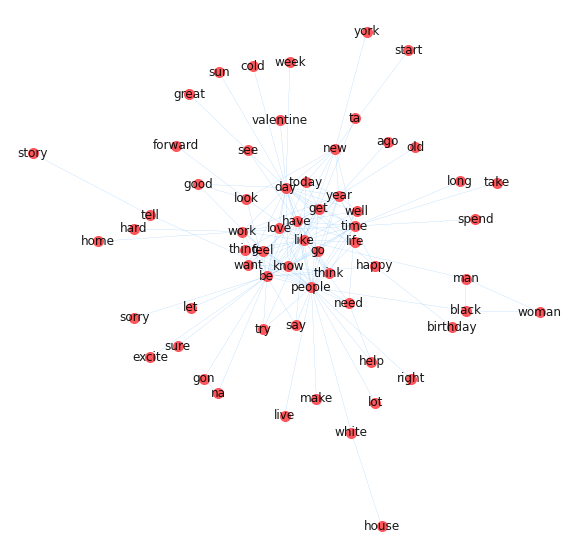

In [62]:
g = wordCooccurrence(df_dict['extravert']['normalized_sents'].sum())
g.remove_edges_from([(n1, n2) for n1, n2, d in g.edges(data = True) if d['weight'] <= 50])
g.remove_nodes_from(list(nx.isolates(g))) #since we are changing the graph list() evaluates the isolates first
giant = max(connected_component_subgraphs(g), key=len) # keep just the giant connected component
print(nx.info(giant))

layout = nx.spring_layout(giant, weight='weight', iterations= 100)
fig, ax = plt.subplots(figsize = (10,10))
nx.draw(giant, ax = ax, pos = layout, labels = {n:n for n in giant.nodes()},
        width=.2, 
        alpha = .9, 
        node_size = 100,
        node_color = "xkcd:light red",
        edge_color='xkcd:sky blue') #Getting labels is a bit annoying

In [63]:
print(', '.join(max(nx.clique.find_cliques(giant), key = lambda x: len(x))))

people, like, have, day, time, be, year, go


# Sentence Cooccurrences, Prospecting vs. Judging

## Prospecting

Name: 
Type: Graph
Number of nodes: 46
Number of edges: 140
Average degree:   6.0870


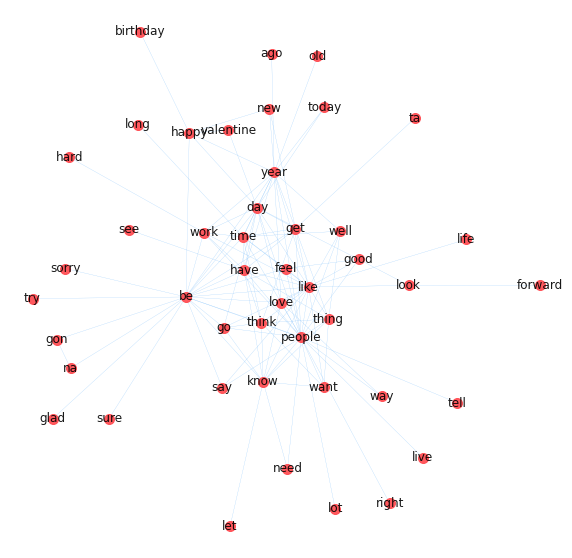

In [64]:
g = wordCooccurrence(df_dict['prospecting']['normalized_sents'].sum())
g.remove_edges_from([(n1, n2) for n1, n2, d in g.edges(data = True) if d['weight'] <= 50])
g.remove_nodes_from(list(nx.isolates(g))) #since we are changing the graph list() evaluates the isolates first
giant = max(connected_component_subgraphs(g), key=len) # keep just the giant connected component
print(nx.info(giant))

layout = nx.spring_layout(giant, weight='weight', iterations= 100)
fig, ax = plt.subplots(figsize = (10,10))
nx.draw(giant, ax = ax, pos = layout, labels = {n:n for n in giant.nodes()},
        width=.2, 
        alpha = .9, 
        node_size = 100,
        node_color = "xkcd:light red",
        edge_color='xkcd:sky blue') #Getting labels is a bit annoying

In [65]:
print(', '.join(max(nx.clique.find_cliques(giant), key = lambda x: len(x))))

people, like, be, day, year, have, time, work


## Judging

Name: 
Type: Graph
Number of nodes: 63
Number of edges: 175
Average degree:   5.5556


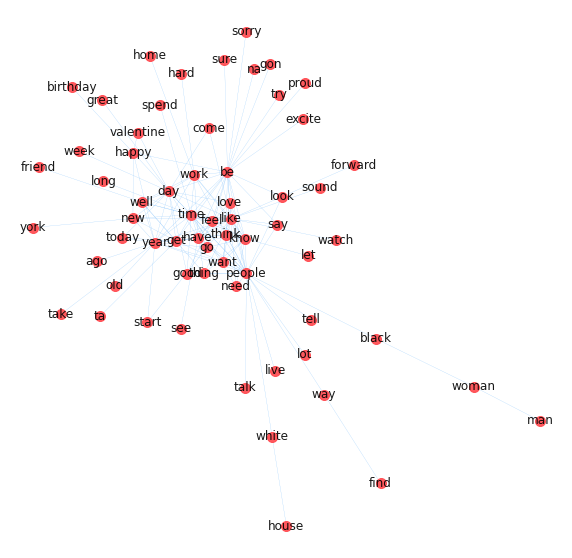

In [66]:
g = wordCooccurrence(df_dict['judging']['normalized_sents'].sum())
g.remove_edges_from([(n1, n2) for n1, n2, d in g.edges(data = True) if d['weight'] <= 50])
g.remove_nodes_from(list(nx.isolates(g))) #since we are changing the graph list() evaluates the isolates first
giant = max(connected_component_subgraphs(g), key=len) # keep just the giant connected component
print(nx.info(giant))

layout = nx.spring_layout(giant, weight='weight', iterations= 100)
fig, ax = plt.subplots(figsize = (10,10))
nx.draw(giant, ax = ax, pos = layout, labels = {n:n for n in giant.nodes()},
        width=.2, 
        alpha = .9, 
        node_size = 100,
        node_color = "xkcd:light red",
        edge_color='xkcd:sky blue') #Getting labels is a bit annoying

In [67]:
print(', '.join(max(nx.clique.find_cliques(giant), key = lambda x: len(x))))

people, like, be, have, time, year, day, work


# Sentence Cooccurrences, Intuitive vs. Observant

## Intuitive

Name: 
Type: Graph
Number of nodes: 54
Number of edges: 175
Average degree:   6.4815


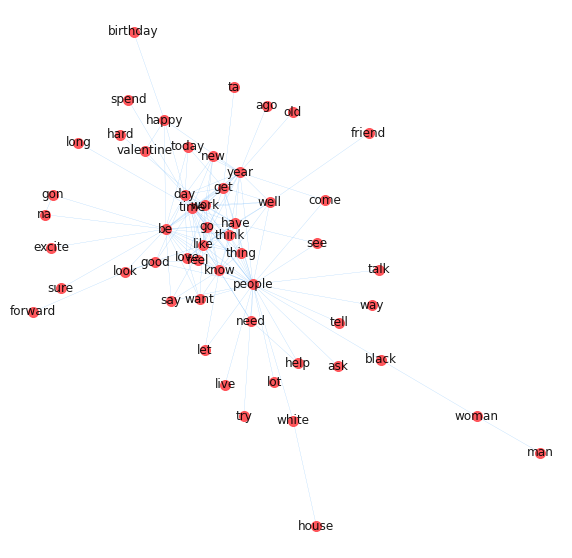

In [68]:
g = wordCooccurrence(df_dict['intuitive']['normalized_sents'].sum())
g.remove_edges_from([(n1, n2) for n1, n2, d in g.edges(data = True) if d['weight'] <= 50])
g.remove_nodes_from(list(nx.isolates(g))) #since we are changing the graph list() evaluates the isolates first
giant = max(connected_component_subgraphs(g), key=len) # keep just the giant connected component
print(nx.info(giant))

layout = nx.spring_layout(giant, weight='weight', iterations= 100)
fig, ax = plt.subplots(figsize = (10,10))
nx.draw(giant, ax = ax, pos = layout, labels = {n:n for n in giant.nodes()},
        width=.2, 
        alpha = .9, 
        node_size = 100,
        node_color = "xkcd:light red",
        edge_color='xkcd:sky blue') #Getting labels is a bit annoying

In [69]:
print(', '.join(max(nx.clique.find_cliques(giant), key = lambda x: len(x))))

people, like, be, have, time, day, year, get, work


## Observant

Name: 
Type: Graph
Number of nodes: 58
Number of edges: 165
Average degree:   5.6897


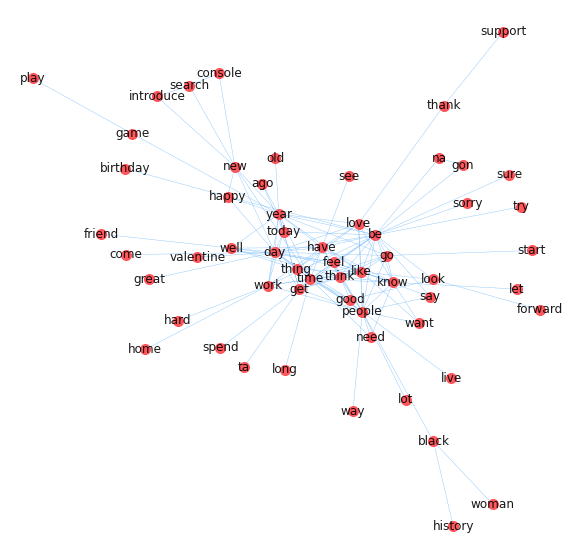

In [70]:
g = wordCooccurrence(df_dict['observant']['normalized_sents'].sum())
g.remove_edges_from([(n1, n2) for n1, n2, d in g.edges(data = True) if d['weight'] <= 50])
g.remove_nodes_from(list(nx.isolates(g))) #since we are changing the graph list() evaluates the isolates first
giant = max(connected_component_subgraphs(g), key=len) # keep just the giant connected component
print(nx.info(giant))

layout = nx.spring_layout(giant, weight='weight', iterations= 100)
fig, ax = plt.subplots(figsize = (10,10))
nx.draw(giant, ax = ax, pos = layout, labels = {n:n for n in giant.nodes()},
        width=.4, 
        alpha = .9, 
        node_size = 100,
        node_color = "xkcd:light red",
        edge_color='xkcd:sky blue') #Getting labels is a bit annoying

In [71]:
print(', '.join(max(nx.clique.find_cliques(giant), key = lambda x: len(x))))

be, like, year, day, have, time, work


# Centralities

In [81]:
for k, v in categories.items():  
    v[1].remove_edges_from([(n1, n2) for n1, n2, d in v[1].edges(data = True) if d['weight'] <= 50])
    v[1].remove_nodes_from(list(nx.isolates(v[1]))) 
    giant = max(connected_component_subgraphs(v[1]), key=len)
    v.append(giant)

## Words most central to each group

### Degree centrality

In [82]:
dcentralities = {k: nx.degree_centrality(v[2]) for k, v in categories.items()}
most_central = {}
for k, v in dcentralities.items():
    s = list(map(lambda x: x[0], sorted(v.items(), reverse = True, key = lambda x: x[1])))[:10]
    most_central[k] = s

In [83]:
pd.DataFrame(most_central)

introvert extravert prospecting judging intuitive observant analyst  \
0    people    people      people  people    people        be  people   
1      like      like          be      be        be    people    like   
2        be       day        like    like      like       day      be   
3      time        be        year    time      time      like    time   
4      year      have         day    year      year      time     day   
5       day      time        have     day       day      year    year   
6     think      year        time    have      have      have    have   
7       get      know        know    know      know      know    know   
8      have      work       think     get      work      work   think   
9      work       new         get    work       get       get    work   

  diplomat sentinel explorer  
0   people      day   people  
1       be       be     like  
2     like     like       be  
3      day   people     have  
4     year     year     time  
5     have     have     year  
6     time      get      day  
7     work     time    think  
8     know     work     know  
9    think       na      get

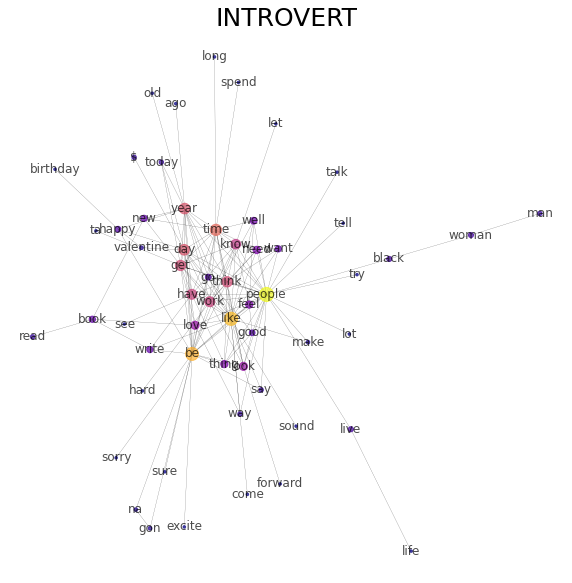

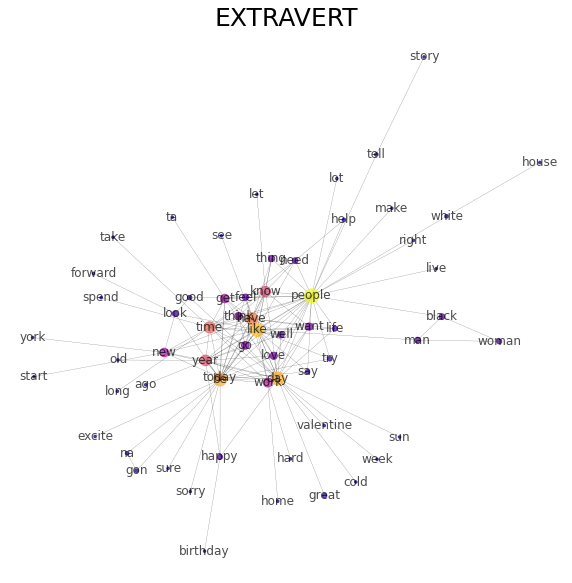

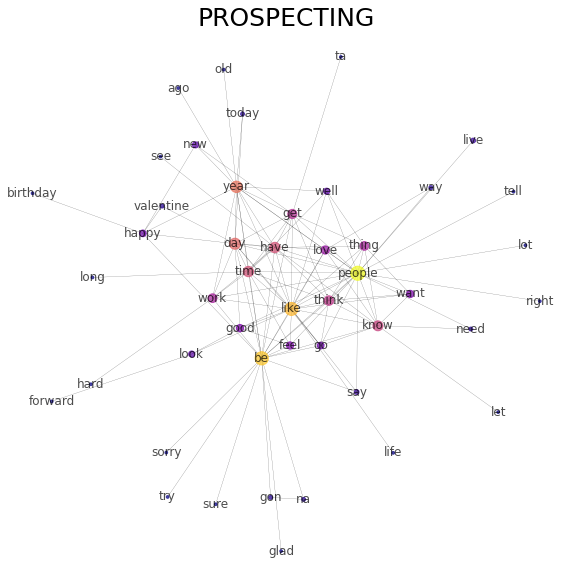

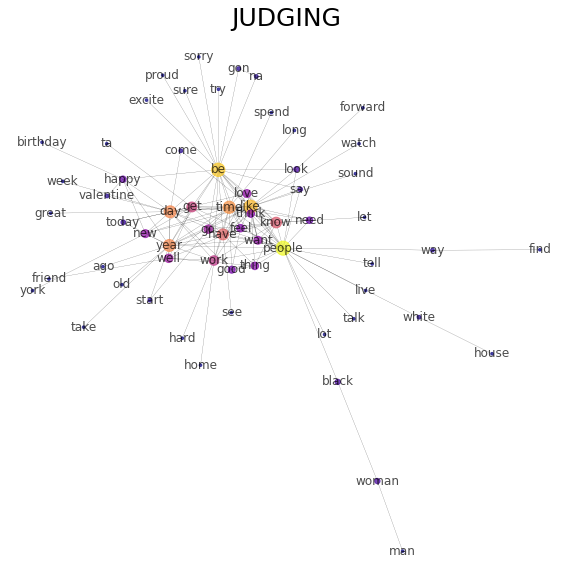

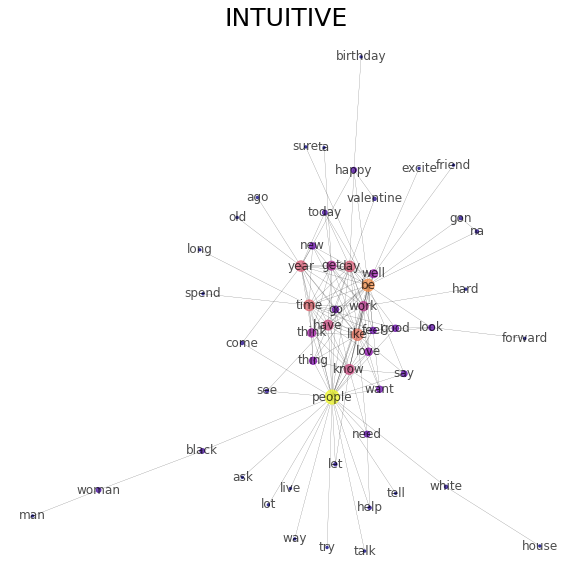

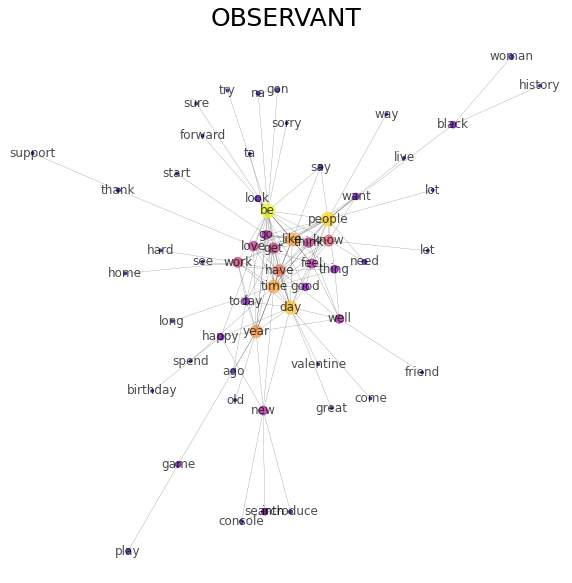

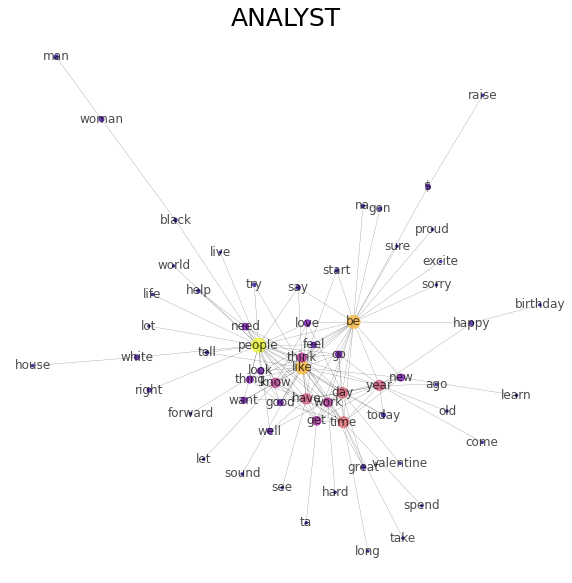

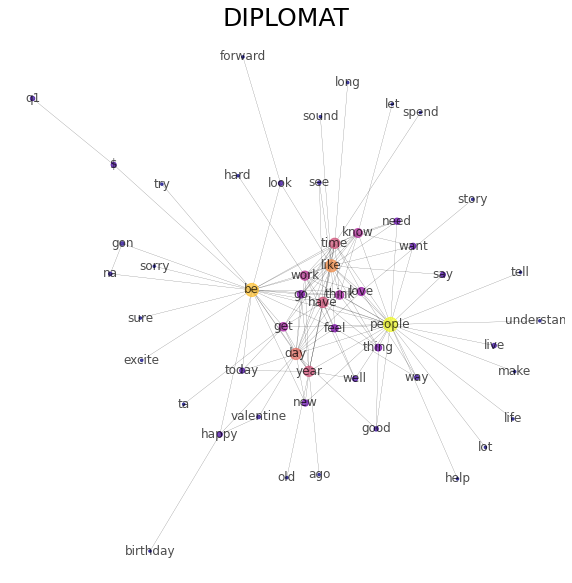

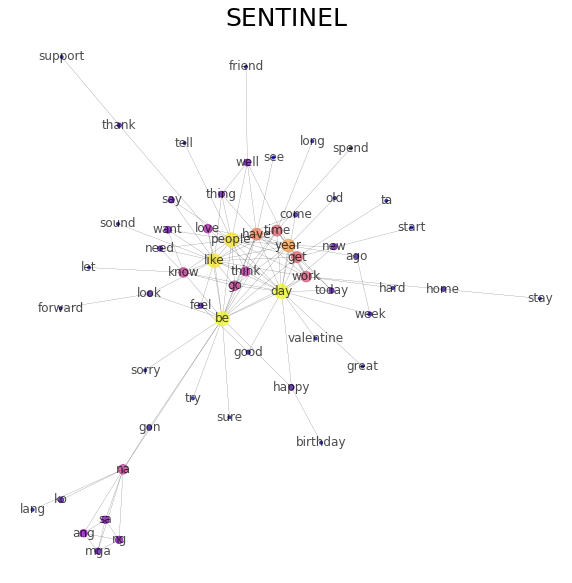

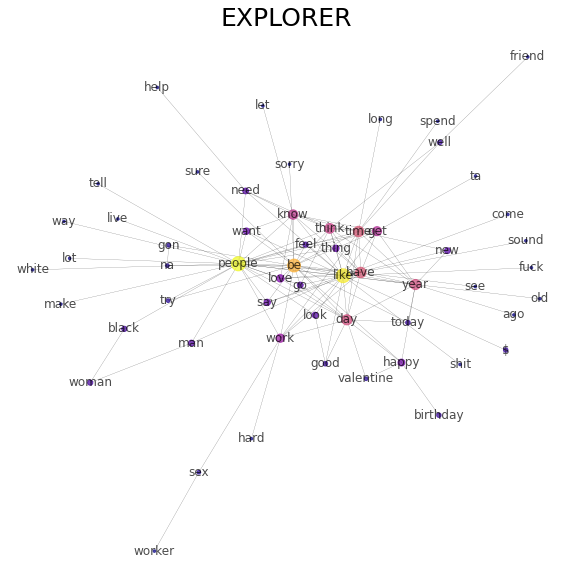

In [84]:
for k, v in dcentralities.items():
    fig, ax = plt.subplots(figsize = (10,10))
    maxC = max(v.items(), key = lambda x : x[1])[1]
    giant = categories[k][2]
    layout = nx.spring_layout(giant, weight='weight', iterations= 100)
    ax.set_title(k.upper(), size=25)
    nx.draw(giant, ax = ax, pos = layout, labels = {n:n for n in giant.nodes()},
            width=.2,
            alpha = .7,
            node_color = [v[n] / maxC for n in giant.nodes],
            node_size = [v[n] / maxC * 200 for n in giant.nodes],
            cmap = plt.get_cmap('plasma'))

### Betweenness centrality

In [85]:
dcentralities = {k: nx.betweenness.betweenness_centrality(v[2]) for k, v in categories.items()}
most_central = {}
for k, v in dcentralities.items():
    s = list(map(lambda x: x[0], sorted(v.items(), reverse = True, key = lambda x: x[1])))[:10]
    most_central[k] = s

In [86]:
pd.DataFrame(most_central)

introvert extravert prospecting judging intuitive observant analyst  \
0    people    people          be  people    people        be  people   
1        be       day      people      be        be    people      be   
2      like        be        like    year      year       day    like   
3      year      like        year     day      time      year    year   
4       day      time         day    like     black      time    time   
5      time      year         get    time       day       new     day   
6     black       new        know    work      like      love   black   
7       get      work        have   black      work      work    have   
8      have      have       happy     get       get     black    know   
9      love      know        time    have     happy      like    work   

  diplomat sentinel explorer  
0       be       be   people  
1   people      day     like  
2     like       na       be  
3     year     like     time  
4      day   people     work  
5     time     year     year  
6     work     work      day  
7     know      get     have  
8     love     time     know  
9    happy     love    think

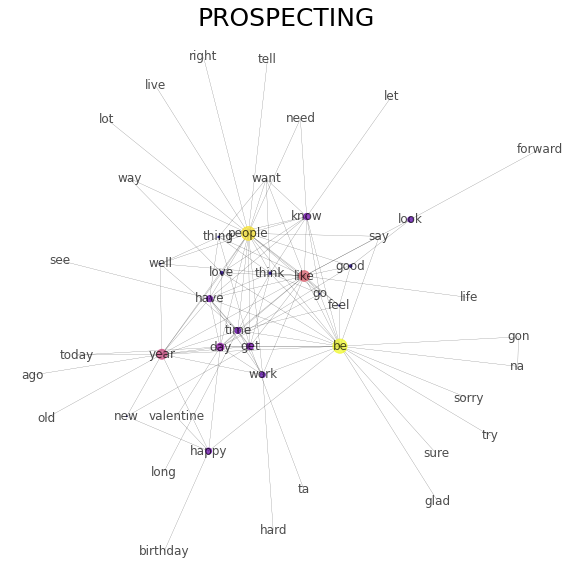

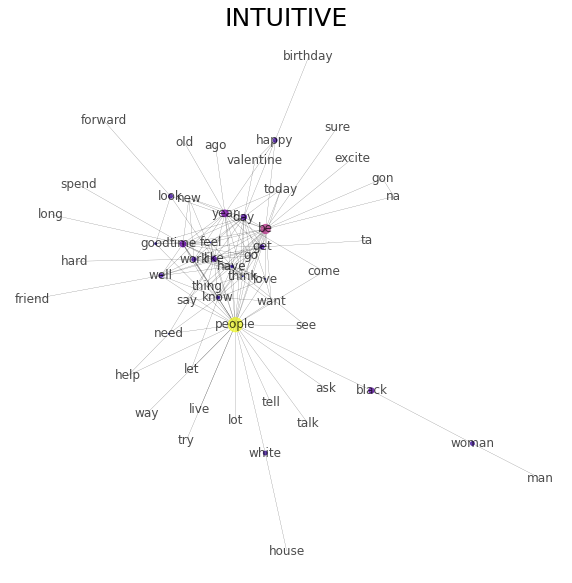

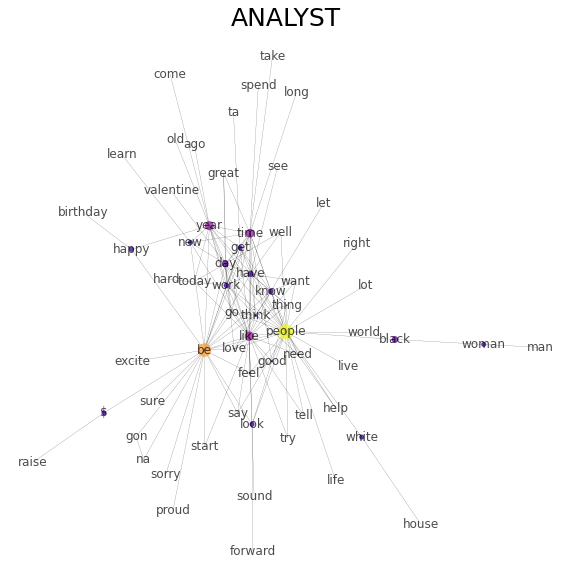

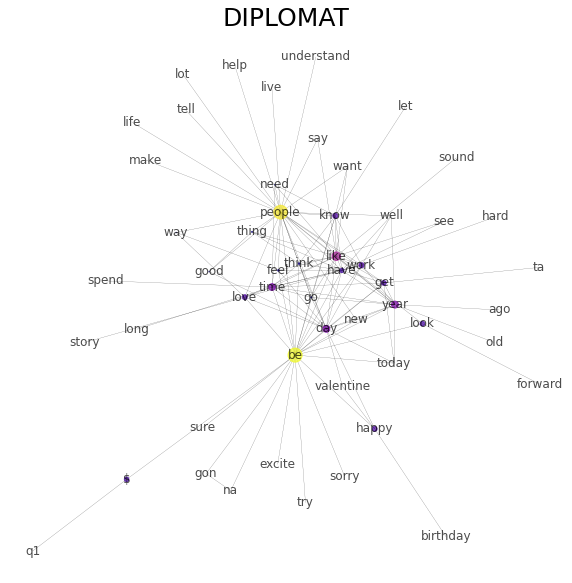

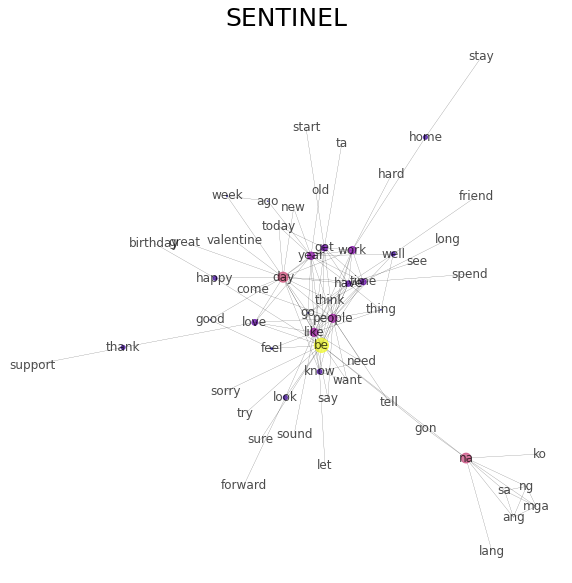

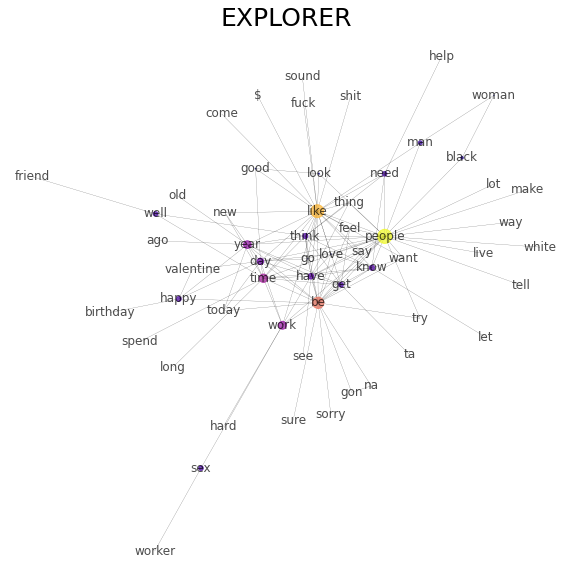

In [88]:
for k, v in dcentralities.items():
    fig, ax = plt.subplots(figsize = (10,10))
    maxC = max(v.items(), key = lambda x : x[1])[1]
    giant = categories[k][2]
    layout = nx.spring_layout(giant, weight='weight', iterations= 100)
    ax.set_title(k.upper(), size=25)
    nx.draw(giant, ax = ax, pos = layout, labels = {n:n for n in giant.nodes()},
            width=.2,
            alpha = .7,
            node_color = [v[n] / maxC for n in giant.nodes],
            node_size = [v[n] / maxC * 200 for n in giant.nodes],
            cmap = plt.get_cmap('plasma'))

### Closeness centrality

In [89]:
dcentralities = {k: nx.closeness_centrality(v[2]) for k, v in categories.items()}
most_central = {}
for k, v in dcentralities.items():
    s = list(map(lambda x: x[0], sorted(v.items(), reverse = True, key = lambda x: x[1])))[:10]
    most_central[k] = s

In [90]:
pd.DataFrame(most_central)

introvert extravert prospecting judging intuitive observant analyst  \
0    people    people      people  people    people        be  people   
1      like      like          be      be        be       day      be   
2        be       day        like    like      like      like    like   
3      time        be        year    time      year    people    time   
4      year      have         day    year      time      time    year   
5       day      time        have     day       day      year     day   
6       get      year        time    have      have      have    have   
7      have      know         get    work      work      work    work   
8     think      work        work     get       get       get     get   
9      work        go       think    know      know      love   think   

  diplomat sentinel explorer  
0   people       be   people  
1       be      day     like  
2     like     like       be  
3      day   people     time  
4     have     year     have  
5     time     have      day  
6     year     work     year  
7     work      get    think  
8      get     time     know  
9       go       go      get

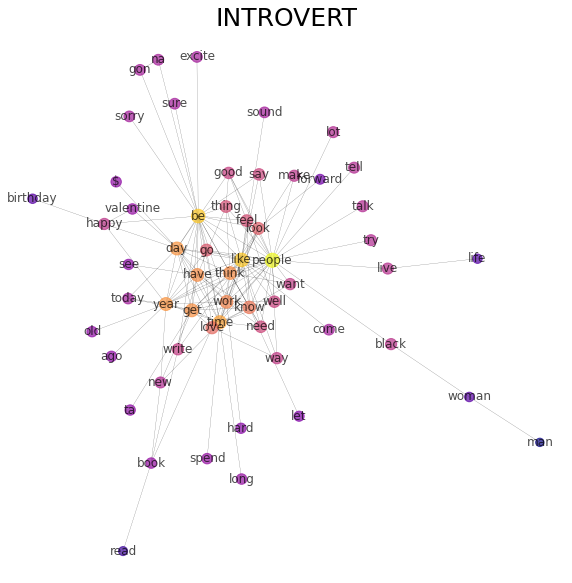

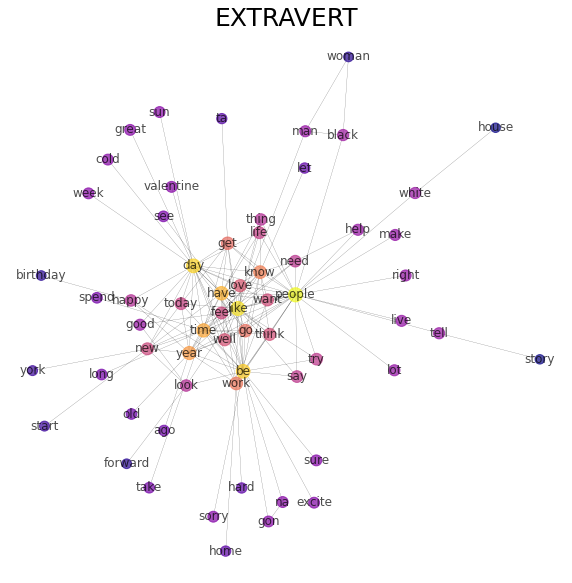

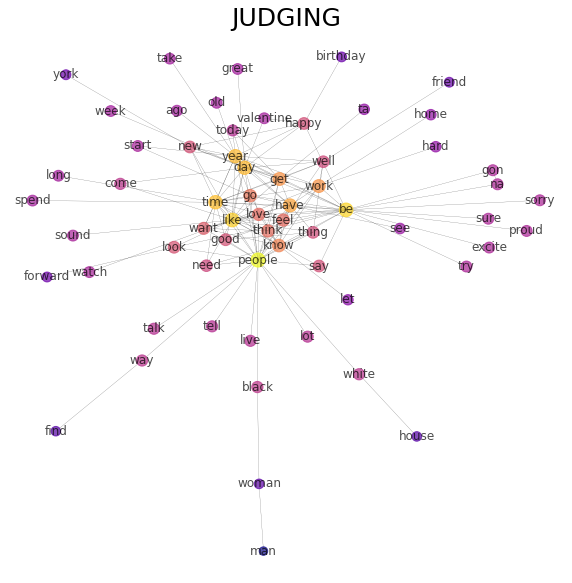

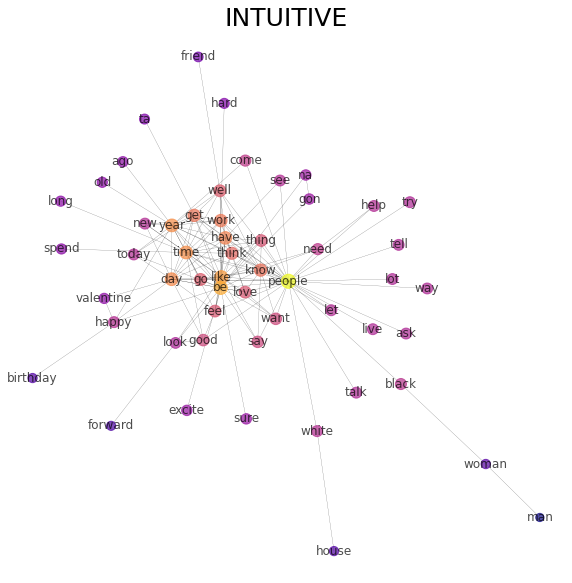

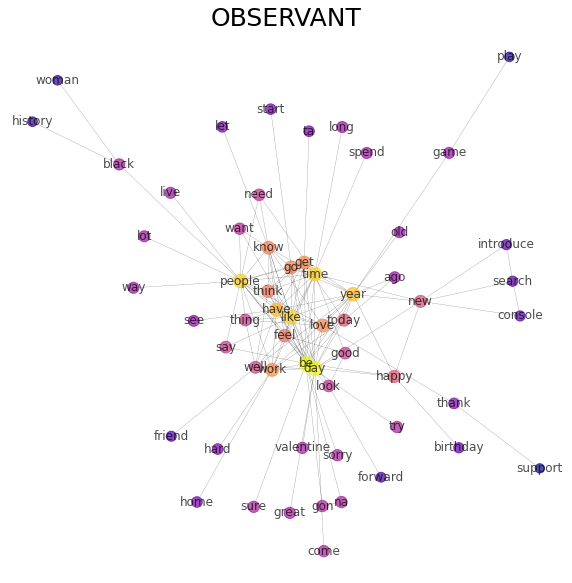

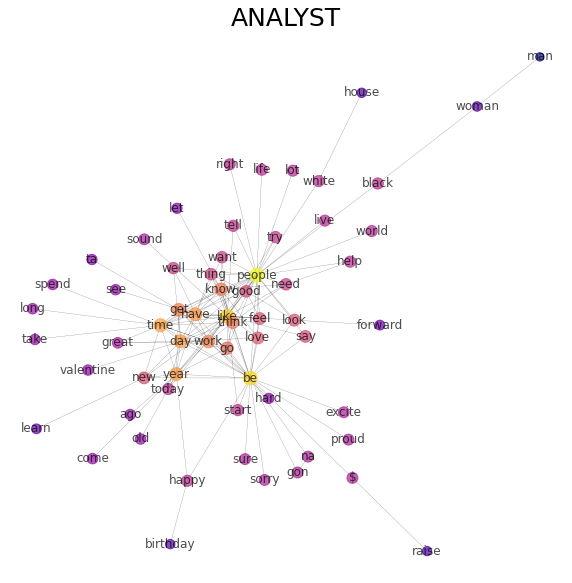

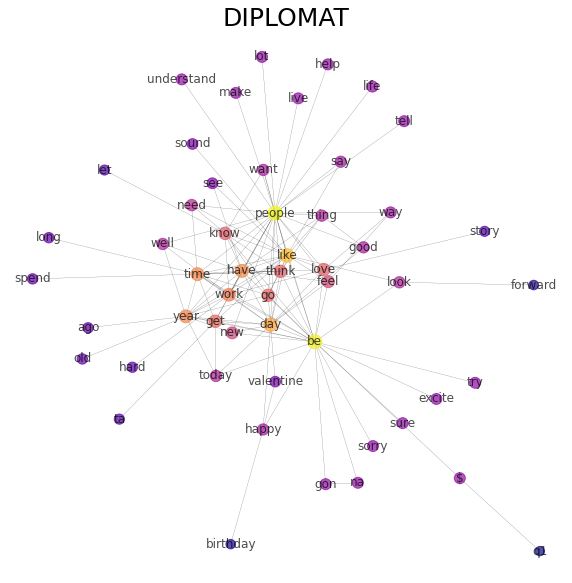

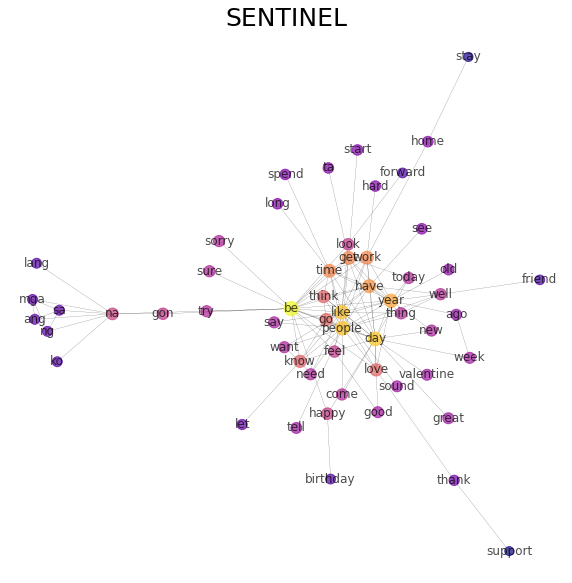

In [91]:
for k, v in dcentralities.items():
    fig, ax = plt.subplots(figsize = (10,10))
    maxC = max(v.items(), key = lambda x : x[1])[1]
    giant = categories[k][2]
    layout = nx.spring_layout(giant, weight='weight', iterations= 100)
    ax.set_title(k.upper(), size=25)
    nx.draw(giant, ax = ax, pos = layout, labels = {n:n for n in giant.nodes()},
            width=.2,
            alpha = .7,
            node_color = [v[n] / maxC for n in giant.nodes],
            node_size = [v[n] / maxC * 200 for n in giant.nodes],
            cmap = plt.get_cmap('plasma'))

### Eigenvector centrality

In [92]:
dcentralities = {k: nx.eigenvector_centrality(v[2]) for k, v in categories.items()}
most_central = {}
for k, v in dcentralities.items():
    s = list(map(lambda x: x[0], sorted(v.items(), reverse = True, key = lambda x: x[1])))[:10]
    most_central[k] = s

In [93]:
pd.DataFrame(most_central)

introvert extravert prospecting judging intuitive observant analyst  \
0    people      like      people  people    people        be  people   
1      like    people        like    like      like      like    like   
2        be      have          be    time        be    people      be   
3      time       day        have      be      time       day    time   
4     think        be         day    have      have      time    have   
5       get      time        year    year       day      have     day   
6      have      year        time     day      year      year    year   
7      work      know       think    know      work      know   think   
8       day        go         get     get      know       get    work   
9      year      work        know    work       get     think     get   

  diplomat sentinel explorer  
0   people   people     like  
1       be     like   people  
2     like      day       be  
3      day       be     have  
4     have     year     time  
5     time     have    think  
6     year     time     year  
7     work      get      day  
8    think     work     know  
9      get       go      get

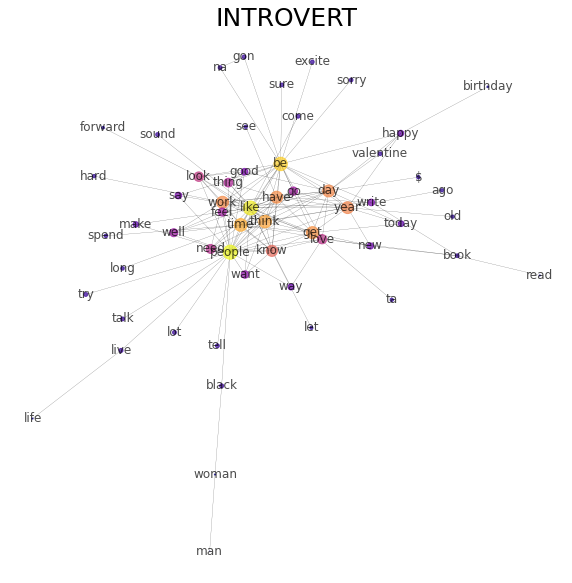

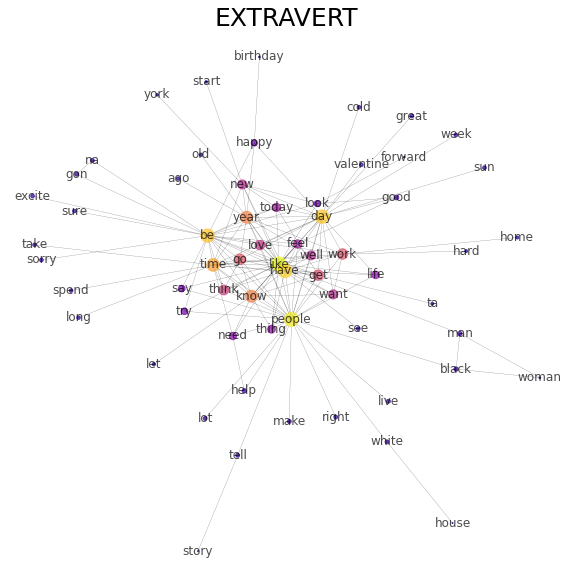

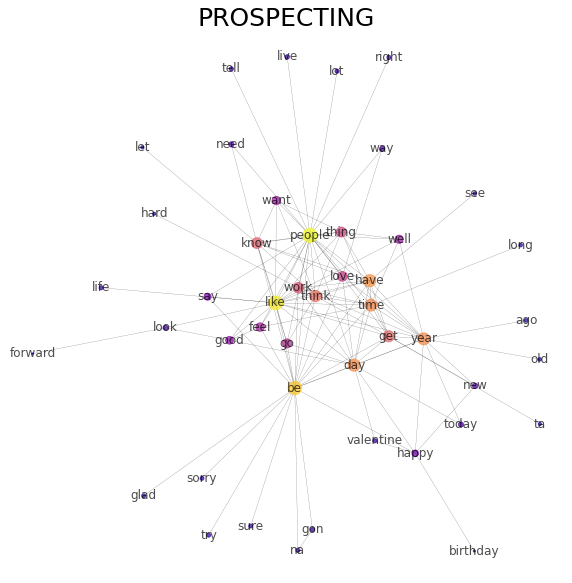

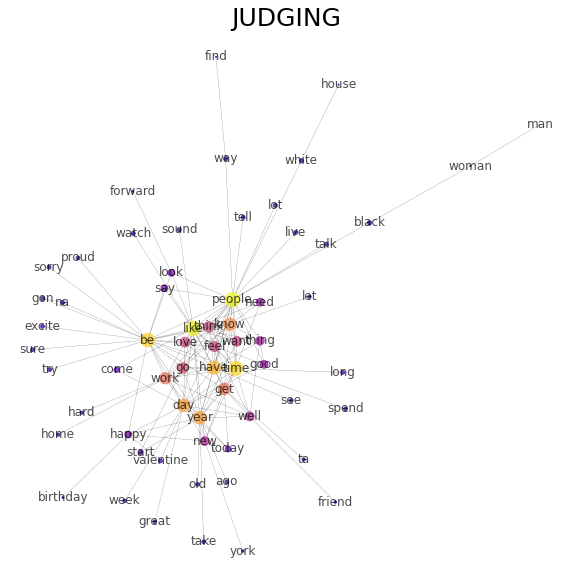

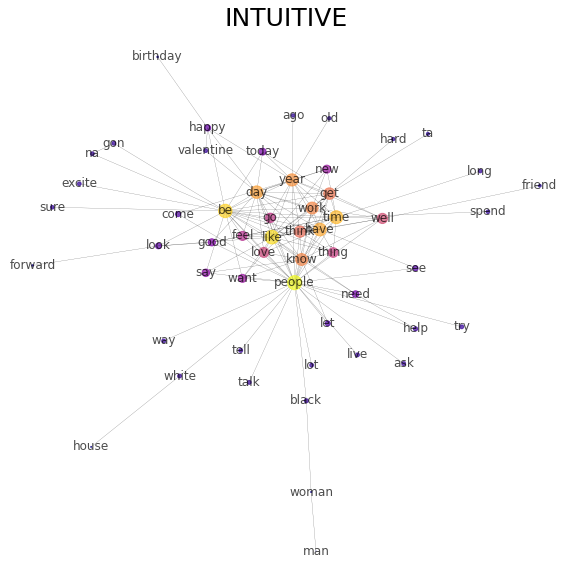

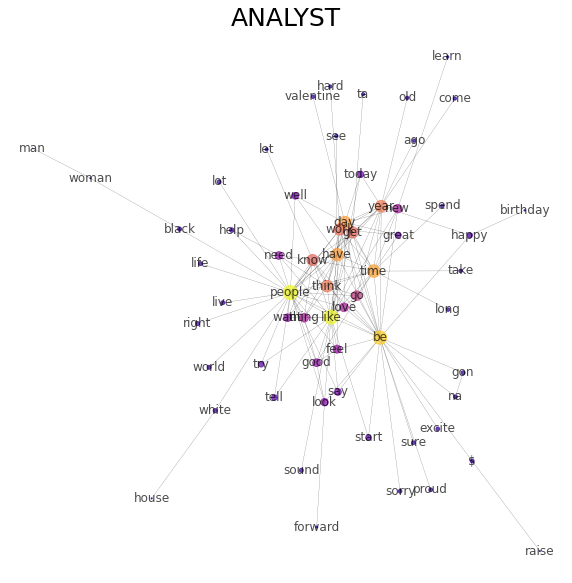

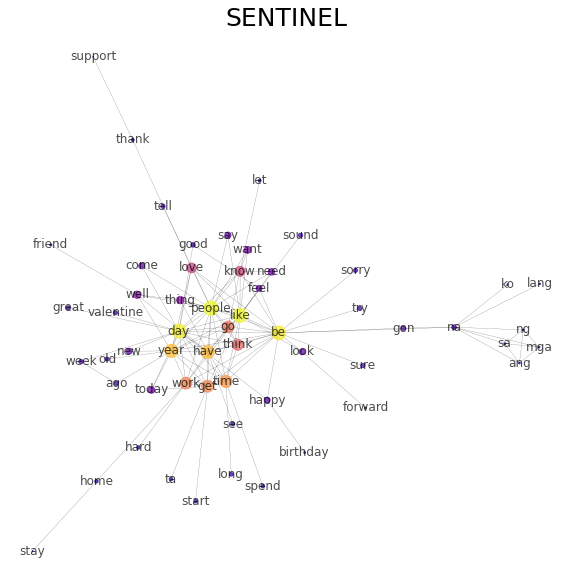

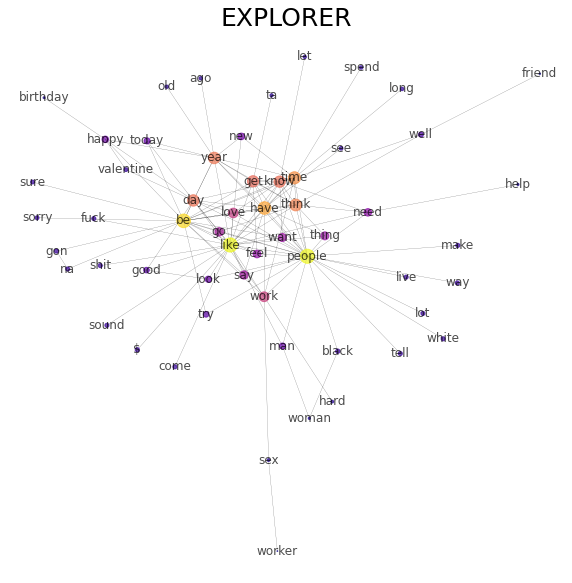

In [97]:
for k, v in dcentralities.items():
    fig, ax = plt.subplots(figsize = (10,10))
    maxC = max(v.items(), key = lambda x : x[1])[1]
    giant = categories[k][2]
    layout = nx.spring_layout(giant, weight='weight', iterations= 100)
    ax.set_title(k.upper(), size=25)
    nx.draw(giant, ax = ax, pos = layout, labels = {n:n for n in giant.nodes()},
            width=.2,
            alpha = .7,
            node_color = [v[n] / maxC for n in giant.nodes],
            node_size = [v[n] / maxC * 200 for n in giant.nodes],
            cmap = plt.get_cmap('plasma'))

In [98]:
def filterWords(G, minWeight = 3, filter_ = "betweenness", rule = "number", value_of_rule = 200):
    """Function to filter network by degree centrality measures"""
    G = G.copy()
    try:
        G.remove_edges_from([(n1,n2) for n1, n2, d in G.edges(data = True) if d['weight'] < minWeight])
    except:
        print("weight might be missing from one or more edges")
        raise
    if filter_ =="betweenness":
        index = nx.betweenness_centrality(G) #betweeness centrality score
    elif filter_ == "closeness":
        index = nx.closeness_centrality(G) #closeness centrality score
    elif filter_ == "eigenvector":
        index = nx.eigenvector_centrality(G) #eigenvector centrality score
    elif filter_ == "degree":
        index = nx.degree_centrality(G) #degree centrality score
    else:
        raise ValueError("wrong filter paremeter, should be: betweenness/closeness/eigenvector")

    if rule=='number':# if filter by limiting the total number of nodes

        sorted_index = sorted(index.items(), key=lambda x:x[1], reverse=True)
        value_of_rule = np.min([value_of_rule, len(G.nodes)])

        nodes_remain = {}
        for word, centr in sorted_index[:value_of_rule]:
            nodes_remain[word] = centr
        G.remove_nodes_from([n for n in index if n not in nodes_remain])
       # print ("Total number of nodes(after filtering) in the graph is %s" % len(G))
        return G

    if rule=='above':# if filter by limiting the min value of centrality
        value_of_rule = np.max([float(value_of_rule),0])
        G.remove_nodes_from([n for n in index if index[n] >=value_of_rule])
        #print ("Total number of nodes(after filtering) in the graph is %s" % len(G))
        return G

    if rule=='below':# if filter by limiting the max value of centrality
        value_of_rule = np.max([float(value_of_rule),0])
        G.remove_nodes_from([n for n in index if index[n] <=value_of_rule])
     #   print ("Total number of nodes(after filtering) in the graph is %s" % len(G))
        return G

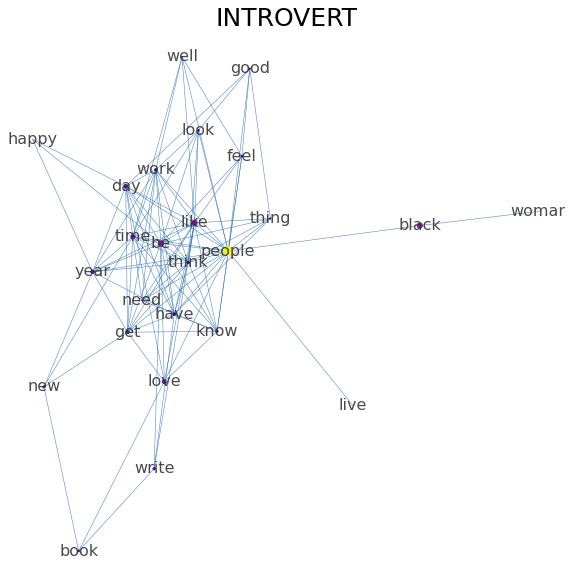

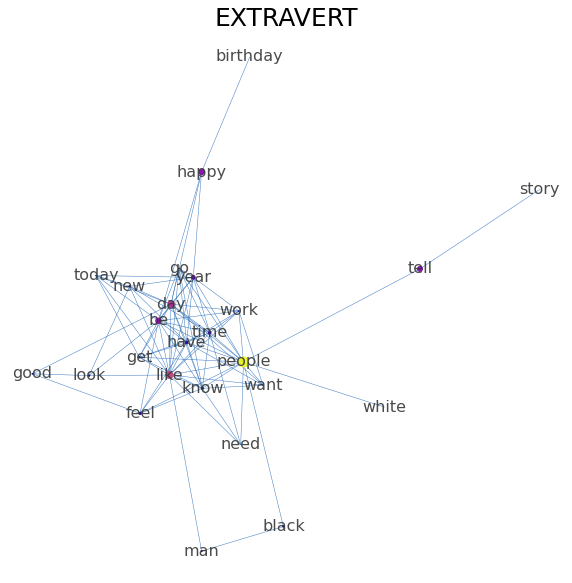

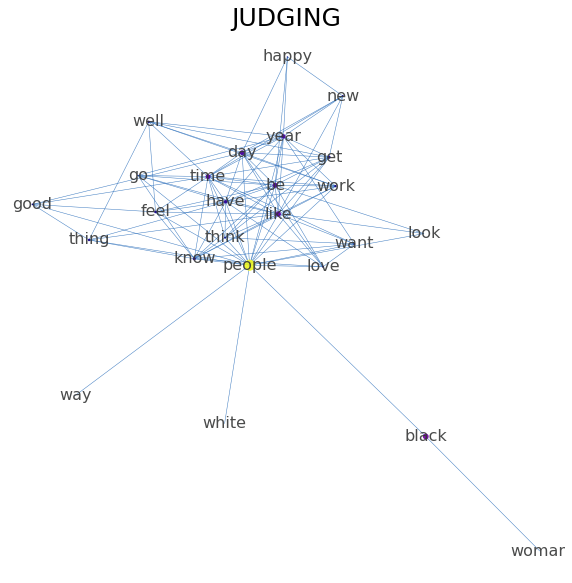

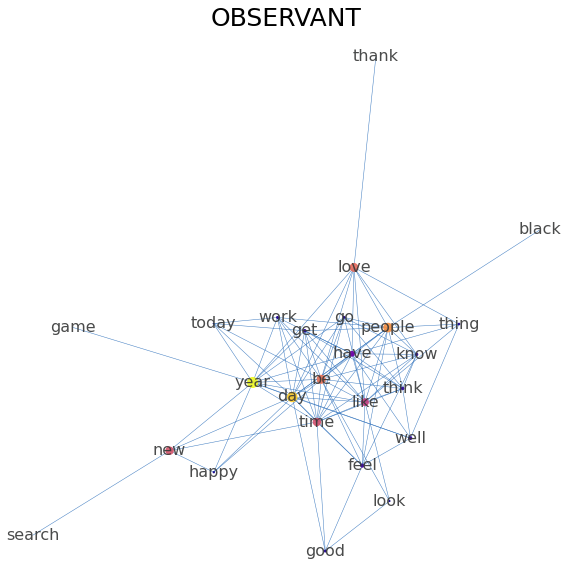

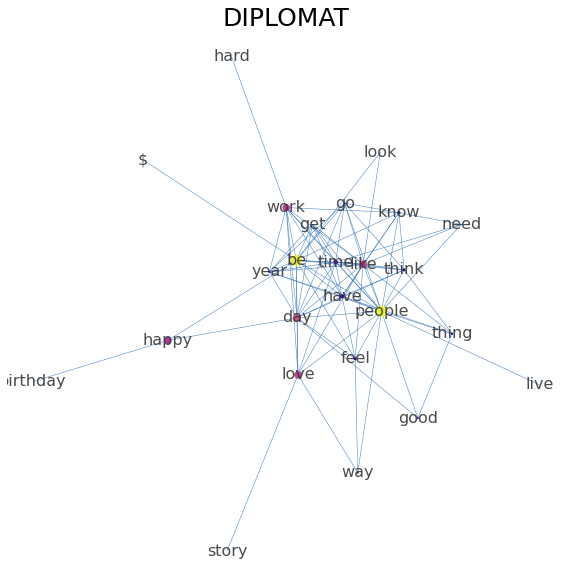

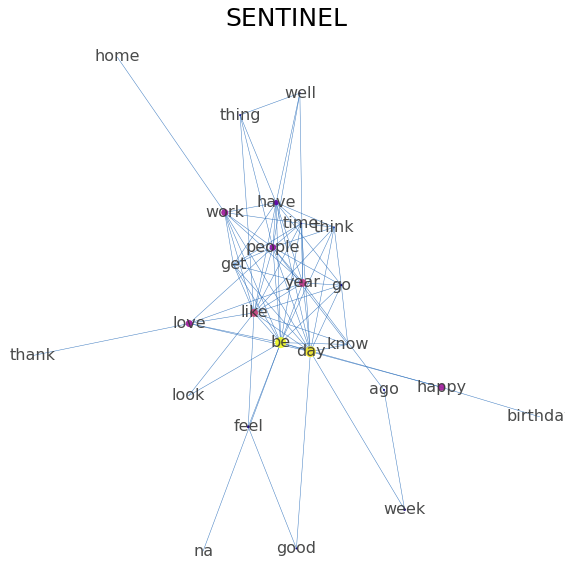

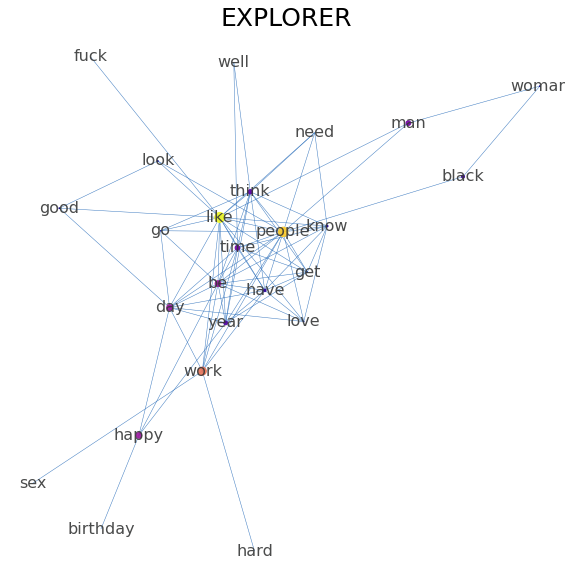

In [99]:
for k, v in dcentralities.items():
    giant = categories[k][2]
    giant_filtered30 = filterWords(giant, minWeight=3, filter_='betweenness', rule='number', value_of_rule=25)
    layout_giant_filtered30 = nx.spring_layout(giant_filtered30, weight='weight', iterations= 100)
    fig, ax = plt.subplots(figsize = (10,10))
    ax.set_title(k.upper(), size = 25)
    centralities_giant30 = nx.betweenness_centrality(giant_filtered30)
    maxC = max(centralities_giant30.items(), key = lambda x : x[1])[1]
    nx.draw(giant_filtered30, ax = ax, pos = layout_giant_filtered30, labels = {n: n for n in giant_filtered30.nodes()},
            alpha = .9,
            width = .5,
            node_color = [centralities_giant30[n] / maxC for n in giant_filtered30.nodes],
            node_size = [centralities_giant30[n] / maxC * 100 for n in giant_filtered30.nodes],
            font_size = 16,
            font_color = 'xkcd:dark grey',
            edge_color = 'xkcd:medium blue',
            cmap = plt.get_cmap('plasma'),
           )

# Divergences

In [100]:
def kl_divergence(X, Y):
    P = X.copy()
    Q = Y.copy()
    P.columns = ['P']
    Q.columns = ['Q']
    df = Q.join(P).fillna(0)
    p = df.iloc[:,1]
    q = df.iloc[:,0]
    D_kl = scipy.stats.entropy(p, q)
    return D_kl

def chi2_divergence(X,Y):
    P = X.copy()
    Q = Y.copy()
    P.columns = ['P']
    Q.columns = ['Q']
    df = Q.join(P).fillna(0)
    p = df.iloc[:,1]
    q = df.iloc[:,0]
    return scipy.stats.chisquare(p, q).statistic

def Divergence(corpus1, corpus2, difference="KL"):
    """Difference parameter can equal KL, Chi2, or Wass"""
    freqP = nltk.FreqDist(corpus1)
    P = pd.DataFrame(list(freqP.values()), columns = ['frequency'], index = list(freqP.keys()))
    freqQ = nltk.FreqDist(corpus2)
    Q = pd.DataFrame(list(freqQ.values()), columns = ['frequency'], index = list(freqQ.keys()))
    if difference == "KL":
        return kl_divergence(P, Q)
    elif difference == "Chi2":
        return chi2_divergence(P, Q)
    elif difference == "KS":
        try:
            return scipy.stats.ks_2samp(P['frequency'], Q['frequency']).statistic
        except:
            return scipy.stats.ks_2samp(P['frequency'], Q['frequency'])
    elif difference == "Wasserstein":
        try:
            return scipy.stats.wasserstein_distance(P['frequency'], Q['frequency'], u_weights=None, v_weights=None).statistic
        except:
            return scipy.stats.wasserstein_distance(P['frequency'], Q['frequency'], u_weights=None, v_weights=None)

In [106]:
personalityDF = pd.DataFrame()

for i in set(tw_small['type']):
    personalityDF = personalityDF.append(tw_small[tw_small['type']==i].sample(n = 41, random_state = 754309))

In [107]:
personalityDF = personalityDF[['type', 'clean_text']].groupby('type').sum()

In [110]:
personalityDF['Tokenized Texts'] = personalityDF['clean_text'].apply(lambda x: lucem_illud.word_tokenize(x[:1500000]))
personalityDF['Normalized Tokens'] = personalityDF['clean_text'].apply(lambda x: lucem_illud.normalizeTokens(x[:1500000]))

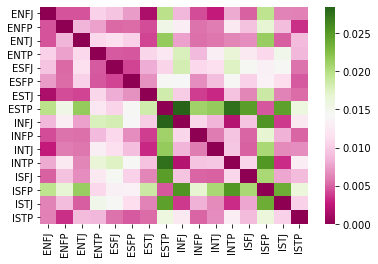

In [111]:
import seaborn as sns

L = []
for p in personalityDF['Normalized Tokens']:
    l = []
    for q in personalityDF['Normalized Tokens']:
        l.append(Divergence(p,q, difference='KS'))
    L.append(l)
M = np.array(L)

fig = plt.figure()
div = pd.DataFrame(M, columns = list(personalityDF.index), index = list(personalityDF.index))
ax = sns.heatmap(div, cmap="PiYG")
plt.show()

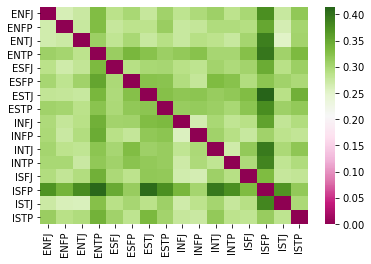

In [112]:
L = []
for p in personalityDF['Normalized Tokens']:
    l = []
    for q in personalityDF['Normalized Tokens']:
        l.append(Divergence(p,q, difference='KL'))
    L.append(l)
M = np.array(L)
fig = plt.figure()
div = pd.DataFrame(M, columns = list(personalityDF.index), index = list(personalityDF.index))
ax = sns.heatmap(div, cmap='PiYG')
plt.show()


In [113]:
i = 0
for df in dfs[-4:]:
    df['role'] = df_labels[-4+i]
    i += 1

In [114]:
roles = dfs[-4:]

In [115]:
sum_roles = []
for df in roles:
    sum_roles.append(df.loc[:, ['role', 'clean_text']].groupby('role').sum())

roles = pd.concat(sum_roles)

In [117]:
roles['Tokenized Texts'] = roles['clean_text'].apply(lambda x: lucem_illud.word_tokenize(x[:1500000]))
roles['Normalized Tokens'] = roles['clean_text'].apply(lambda x: lucem_illud.normalizeTokens(x[:1500000]))

In [118]:
L = []
for p in roles['Normalized Tokens']:
    l = []
    for q in roles['Normalized Tokens']:
        l.append(Divergence(p,q, difference='KS'))
    L.append(l)
M = np.array(L)

fig = plt.figure()
div = pd.DataFrame(M, columns = list(roles.index), index = list(roles.index))
ax = sns.heatmap(div, cmap="PiYG")
plt.show()